## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice.
study_df["Mouse ID"].value_counts()
study_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup_id = study_df.loc[study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_dup_id

array(['g989'], dtype=object)

In [57]:
# Optional: Get all the data for the duplicate mouse ID.
dup_id_df = study_df.loc[study_df["Mouse ID"] == "g989", :]
dup_id_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [58]:
mouse_index=dup_id_df[dup_id_df["Mouse ID"] == "g989"].index
print(mouse_index)

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df.drop(mouse_index, inplace=True)

In [60]:
# Checking the number of mice in the clean DataFrame.
study_df["Mouse ID"].value_counts()

x581    10
y865    10
a492    10
t724    10
a411    10
        ..
l872     1
v199     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Setting index as regimen and creating df grouped by regimen
regimen_df = study_df.set_index('Drug Regimen')
tumor_mean = regimen_df.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
tumor_median = regimen_df.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
tumor_variance = regimen_df.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
tumor_std = regimen_df.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
tumor_sem = regimen_df.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]


tumor_summary_df=pd.DataFrame({"Mean Tumor Volume (mm3)": tumor_mean,
                              "Median Tumor Volume *mm":tumor_median, 
                              "Tumor Variance": tumor_variance, 
                              "Tumor Standard Deviation":tumor_std, 
                              "SEM":tumor_sem})
tumor_summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume *mm,Tumor Variance,Tumor Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
tumor_summary_df = regimen_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
tumor_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

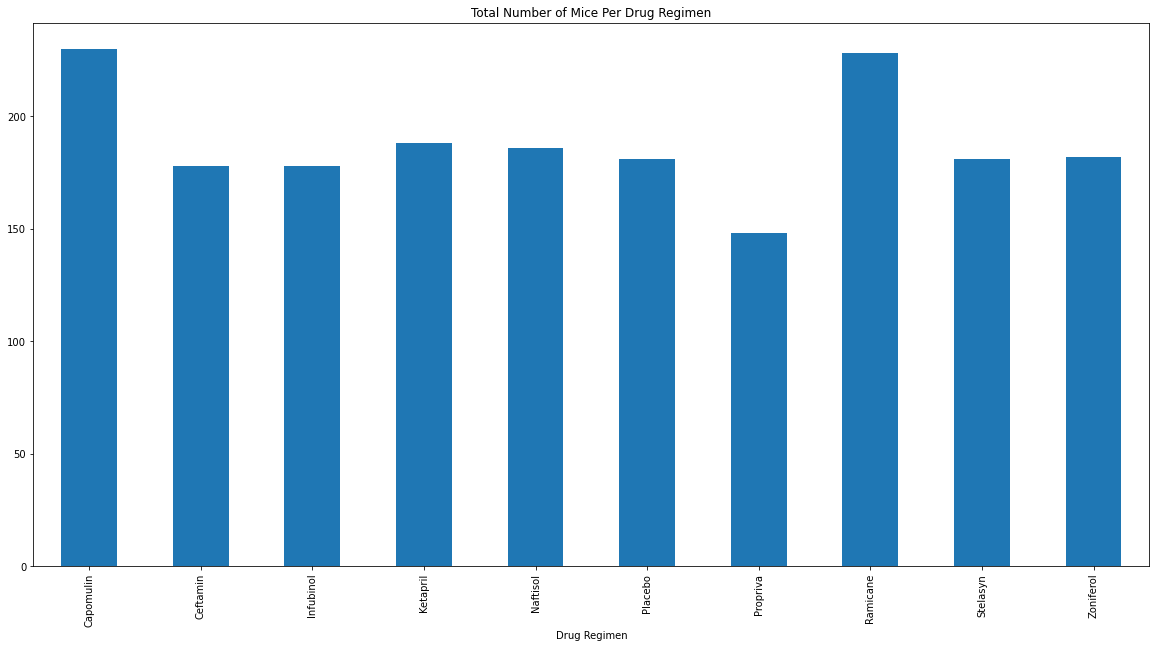

In [63]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_regimen_group_df= regimen_df.groupby(['Drug Regimen']).count()["Mouse ID"]

#mouse_regimen_group_df=mouse_regimen_group_df.set_index("Drug Regimen")
mouse_regimen_group_df.head()

mouse_regimen_group_df.plot(kind="bar", figsize=(20,10))
plt.title("Total Number of Mice Per Drug Regimen")
plt.show()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


Text(0, 0.5, 'Number of Mice')

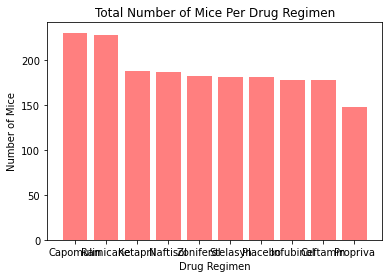

In [64]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_summary= study_df['Drug Regimen'].value_counts()
print(mouse_summary)

plt.bar(mouse_summary.index.values, mouse_summary, color='r', alpha=.5, align="center")
plt.title("Total Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

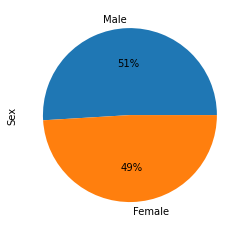

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_quantity=study_df["Sex"].value_counts()
gender_quantity.plot.pie(y='Total', autopct="%1.0f%%")



Male      958
Female    922
Name: Sex, dtype: int64


([<matplotlib.patches.Wedge at 0x1c0ff638470>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51%'),
  Text(0.018044734954153686, -0.5997285948997549, '49%')])

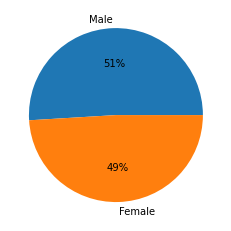

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_quantity=study_df["Sex"].value_counts()
print(gender_quantity)

labels=["Male", "Female"]
sizes=study_df["Sex"].value_counts()

plt.pie(sizes, labels=labels, autopct="%1.0f%%")

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_df=study_df.loc[:,["Mouse ID","Drug Regimen", "Tumor Volume (mm3)",'Timepoint']]

# Start by getting the last (greatest) timepoint for each mouse
mouse_group=final_tumor_df.groupby(["Mouse ID"]).max()["Timepoint"]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_tumor=pd.merge(mouse_group.to_frame(), study_df, on=["Mouse ID", "Timepoint"])
mouse_tumor
mouse_tumor.reset_index()

,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,0,a203,45,Infubinol,Female,20,23,67.973419,2
1,1,a251,45,Infubinol,Female,21,25,65.525743,1
2,2,a262,45,Placebo,Female,17,29,70.717621,4
3,3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,243,z435,10,Propriva,Female,12,26,48.710661,0
244,244,z578,45,Ramicane,Male,11,16,30.638696,0
245,245,z581,45,Infubinol,Female,24,25,62.754451,3
246,246,z795,45,Naftisol,Female,13,29,65.741070,3


In [105]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []
for drug in drugs:
    tumor_total = mouse_tumor.loc[mouse_tumor["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_vol.append(tumor_total)

print(tumor_total)

# Put treatments into a list for for loop (and later for plot labels)
quartiles = tumor_total.quantile([.25, .5, .75]) 
lowerq=quartiles[.25]
upperq=quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [102]:
#drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#treatment_sorted = mouse_tumor[mouse_tumor["Drug Regimen"].isin(drugs)]

#treatment_group = treatment_sorted.groupby(["Drug Regimen"]).agg(**{"total_tumor_volume": pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc=sum),})
#treatment_group

In [69]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

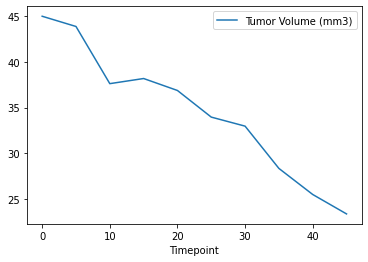

In [70]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
final_tumor_df=study_df.loc[:,["Mouse ID","Drug Regimen", "Tumor Volume (mm3)",'Timepoint']]
cap_treat=final_tumor_df.loc[final_tumor_df["Drug Regimen"]=="Capomulin"]
cap_treat_one=cap_treat.loc[cap_treat["Mouse ID"]=="s185"]
cap_treat_one
cap_treat_one.plot.line(x="Timepoint", y="Tumor Volume (mm3)")

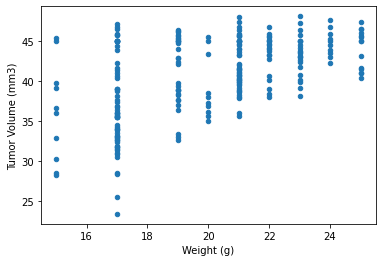

In [100]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
final_weight_df=study_df.loc[:,["Mouse ID","Drug Regimen", "Tumor Volume (mm3)",'Timepoint', "Weight (g)"]]
cap_weight=final_weight_df.loc[final_weight_df["Drug Regimen"]=="Capomulin"]
cap_weight.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")

## Correlation and Regression

In [72]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
final_weight_df=study_df.loc[:,["Mouse ID","Drug Regimen", "Tumor Volume (mm3)",'Timepoint', "Weight (g)"]]
cap_weight=final_weight_df.loc[final_weight_df["Drug Regimen"]=="Capomulin"]
cap_weight

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint,Weight (g)
10,s185,Capomulin,45.000000,0,17
11,s185,Capomulin,43.878496,5,17
12,s185,Capomulin,37.614948,10,17
13,s185,Capomulin,38.177232,15,17
14,s185,Capomulin,36.866876,20,17
...,...,...,...,...,...
440,i557,Capomulin,47.685963,45,24
1452,r157,Capomulin,45.000000,0,25
1453,r157,Capomulin,45.597064,5,25
1454,r157,Capomulin,46.059608,10,25


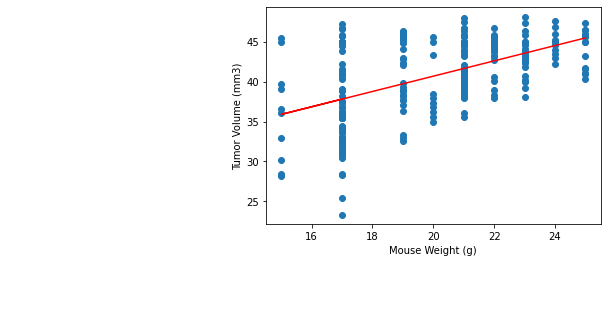

y = 0.96x + 21.49


In [80]:
x_values = cap_weight['Weight (g)']
y_values = cap_weight['Tumor Volume (mm3)']
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
print(line_eq)


In [88]:
cap_weight_corr =cap_weight.corr()
cap_weight_corr.unstack().sort_values()[5]
print(f"The correlation coefficient between mouse weight (g) and tumor volume (mm3) for the Capomulin drug regimen is {cap_weight_corr.unstack().sort_values()[5]}")

The correlation coefficient between mouse weight (g) and tumor volume (mm3) for the Capomulin drug regimen is 0.5256995552077163


In [89]:
#print(f"The correlation coefficient between mouse weight (g) and tumor volume (mm3) on the Capomulin drug regimen is {round(st.pearsonr(['Weight (g)'],['Tumor Volume (mm3'])[0],2)}")